<a href="https://colab.research.google.com/github/juseonmin/bioinfo/blob/main/Free_Project_2022_22456_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - (final)Free Project

2022-22456 주선민

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2022년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```.


#실습 목표
- LIN28A Is a Suppressor of ER-Associated
Translation in Embryonic Stem Cells, Cell 151, 765–777, November 9, 2012
- 위 논문의 figure 2E를 재현한다. 
- figure 2E : Normalized relative frequency of Watson-Crick pair between two bases flanking LIN28A binding sites

#실습용 환경 조성
- google drive 마운트
- 실습용 Bioconda 환경 설치
- 추가 다운로드
- 실습 파일 이동

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.tmux.conf
./root/.vimrc
./root/.profile
./root/.condarc
--2022-06-10 01:44:37--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  73.06M   103MB/s    in 0.7s    

2022-06-10 01:44:38 (103 MB/s) - ‘miniconda3.sh’ save

In [7]:
!conda install -y bedtools bioawk

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h7132678_7         196 KB  bioconda
    ------------------------------------------------------------
                                           Total:         196 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h7132678_7



bioawk-1.0           | 196 KB    | : 100% 1.0/1 [00:00<00:00,  4.91it/s]                
Prepar

In [8]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


#pileup 해서 depth 50 이상만 추출
- UV에 의해 단백질이 가교결합 한 자리는 reversetranscriptase가 오류를 냄.
- 오류율을 분석하여 단백질이 결합했던 자리를 분석할 수 있음.
-lin28a는 Mirlet7에 주로 붙는다고 알려져 있었으나 다른 mRNA와도 상호작용함.
-CRES를 shannon entropy로 구해서 genome에서 lin28a가 상호작용하는 position을 알아낼 수 있음.
-genome mm39 

In [42]:
# CLIP-seq 데이터를 pile up하기
!samtools mpileup CLIP-35L33G.bam > CLIP-35L33G.pileup
!wc -l CLIP-35L33G.pileup # 글자수 세서 용량 확인

[mpileup] 1 samples in 1 input files
959697300 CLIP-35L33G.pileup


In [43]:
!samtools view CLIP-35L33G.bam | head

SRR458758.23028115	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	HHGHHGE@GGHHED?GEGDG	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.23879202	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	GBGGEEAAF=CEEDEGBGG>	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.23893532	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	G@?GGE=EFBDDGGGGD@GG	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.26501547	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	IIIHIIIHIGHIIIHEHIHH	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.685997	16	chr1	3059006	0	22M	*	0	0	TTCATTTACAGAATGGAATACT	EG7:776DGGGBD<GGEBGEG@	MD:Z:22	NH:i:30	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:+
SRR458758.12045118	16	chr1	3059006	0	22M	*	0	0	TTCATTTACAGAATGGAATACT	IFGIDDIHIHEIIIIIIIIHBI	MD:Z:22	NH:i:30	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:+
SRR458758.15313921	16	chr1	3059006	0	22M	*	0	0	TTCATTTAC

In [45]:
# 파일이 너무 커서 먼저 count 50 이상으로 pileup 파일을 잘라줌
# 후에 pileup에 있는 문자들 없애서 다시 count 세서 CRES FDR 맞출 예정 (read depth >= 50, shannon entropy >= 0.8)
!awk '$4 >= 50 { print $0; }' CLIP-35L33G.pileup > CLIP-35L33G-readcut.pileup
!head CLIP-35L33G-readcut.pileup

chr1	3222722	N	124	CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A	HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GIH@HEIHDIHDIIGHFFGFIIHI@HIGHIIIIIIIIGGBIBHHIHDGIIHBIF=GDDHIHGIHDHIHGBGBFGGHHGGF
chr1	3222723	N	146	GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G	E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GII@@HIHGIIEIIGIH0DIIIHIDHIBGIIIIIIIIIF?IBHHIHDGIIHGIBGEHDEI1HGHHEHFIGB@GH>GHDE>IGHIBHIEGGHGBGHGIGIDII
chr1	3222724	N	155	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A^!A

In [9]:
#pandas로 pileup 파일 불러오기
import pandas as pd
pileup= pd.read_csv('CLIP-35L33G-readcut.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])

#baseread 컬럼에 포함된 base 이외의 정보 [<>$*#+^!] 등을 제거해주기
#두번에 걸쳐서 하는 이유는 ^는 read의 전체 mapping quality를 나타내므로 뒤에 ascii 문자와 함께 지워야하기 때문에 두번으로 나눠서 지움
pileup['matches']=pileup['basereads'].str.replace(pat=r'[<>$*#]+', repl= r'', regex=True) 
pileup['matches']=pileup['matches'].str.replace(pat='\^(.)', repl= r'', regex=True) 
pileup

,chrom,pos,_ref,count,basereads,quals,matches
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...,CCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
1,chr1,3222723,N,146,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...
2,chr1,3222724,N,155,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,H>GIGHHIHHDG:@IIIBIHDIIHG=HHDDG;IHHH;IIIDG?DIE...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
3,chr1,3222725,N,157,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,HGDEHHIIHHIG?DIIIEIGDIIHDBBH=DI;IIHBBIII4GD3GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...
...,...,...,...,...,...,...,...
25210334,MU069435.1,1564,N,305,>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,DIDHGHIIGIGIEDIGIHIIG?FBGG@E=:A7G8@HHIHIIDDBII...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
25210335,MU069435.1,1565,N,297,>>>>AAAAAAAAAAAA$AA$AA$A$AA$AA$A$AAAAAAAAAAAAA...,DIDHBHHIIIGICGIGIEIHDEFBGE8C=1?1G88IHIHIIDGBHI...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
25210336,MU069435.1,1566,N,289,>>>>CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,DIDHG>IIHIHHCEIIIEB5D@;=H5BIHIHHI<DAIIBDIIFIIH...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
25210337,MU069435.1,1567,N,291,>>>>T$T$T$T$T$T$T$T$T$T$T$T$T$T$T$TTTTTTTTTT$T...,DIDHFHGIIIIIDDIII?B=G::B=G=DIHIHIID@BIIGGIIHIH...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...


In [10]:
#위에서 처리한 데이터로 다시 depth 50이상으로 필터링해줌
pileup_readcut = pileup[(pileup['matches'].str.len() >= 50)]

#필요한 컬럼만 뽑아서 작업하기
pileup_for_bed = pileup_readcut[['chrom','pos','matches']]

#Crosslinking-induced reverse-transcription error score (CRES) 구하기
- 위에서 구한 pileup df을 이용해서 CRES를 구할 수 있음
- 각 position 별로 base 수를 세줌
- 각 position 별로 shannon entropy 구하기
- 0.8 이상으로 cut (for FDR)
- bed file로 만들기
- reverse(소문자 base) strand는 고려하지 않음

In [11]:
#base 수 세기
for i in 'A','T','C','G':
  pileup_for_bed[i] = pileup_for_bed['matches'].str.count(i)
pileup_for_bed['length'] = pileup_for_bed[['A','T','C','G']].sum(axis=1)  
pileup_for_bed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrom,pos,matches,A,T,C,G,length
0,chr1,3222722,CCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,121,0,3,0,124
1,chr1,3222723,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0,0,0,146,146
2,chr1,3222724,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,155,0,0,0,155
3,chr1,3222725,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,5,0,0,152,157
4,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,55,0,20,81,156
...,...,...,...,...,...,...,...,...
25210334,MU069435.1,1564,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0,301,0,0,301
25210335,MU069435.1,1565,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,293,0,0,0,293
25210336,MU069435.1,1566,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0,1,284,0,285
25210337,MU069435.1,1567,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0,287,0,0,287


In [12]:
#shannon entropy 구하기
import numpy as np
ent = pd.DataFrame()
for i in 'A','T','C','G':
    ent[i] = np.log2(1/(pileup_for_bed[i]/pileup_for_bed['length']))*(pileup_for_bed[i]/pileup_for_bed['length'])
pileup_for_bed['entropy'] = ent.sum(axis=1)
pileup_for_bed 

,chrom,pos,matches,A,T,C,G,length,entropy
0,chr1,3222722,CCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,121,0,3,0,124,0.164379
1,chr1,3222723,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0,0,0,146,146,0.000000
2,chr1,3222724,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,155,0,0,0,155,0.000000
3,chr1,3222725,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,5,0,0,152,157,0.203572
4,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,55,0,20,81,156,1.401164
...,...,...,...,...,...,...,...,...,...
25210334,MU069435.1,1564,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0,301,0,0,301,0.000000
25210335,MU069435.1,1565,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,293,0,0,0,293,0.000000
25210336,MU069435.1,1566,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0,1,284,0,285,0.033667
25210337,MU069435.1,1567,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0,287,0,0,287,0.000000


In [13]:
#0.8 이상으로 entropy cut
entropy_cut = pileup_for_bed[(pileup_for_bed['entropy'] >= 0.8)]
entropy_cut

,chrom,pos,matches,A,T,C,G,length,entropy
4,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,55,0,20,81,156,1.401164
46,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,0,12,53,93,158,1.261116
318,chr1,4631665,ggggggggggggggGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,57,0,3,96,156,1.071389
348,chr1,4631695,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51,0,28,371,450,0.834922
376,chr1,4631745,CCCCCCCTTTCCCTCTCTTCTCCTCTTTTcccccccCCCCCCCCCC...,0,13,36,0,49,0.834648
...,...,...,...,...,...,...,...,...,...
25210020,MU069435.1,505,TCCTCTTTCTCCTTCCTCCCCCCCCCCCCCCTCCCTCCCCCCCTCC...,6,423,1455,5,1889,0.822535
25210096,MU069435.1,581,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,12,366,655,1821,2854,1.314127
25210097,MU069435.1,582,GGGGGGGGGGGGGGGGGGGGGGGGGGGTTTGGGGGGGGGTGGTGGG...,213,225,82,2334,2854,0.952813
25210240,MU069435.1,1023,GGGGGGAGGGAAGGAGGGGGGAGGGGGGGAGAGAGGGAGGCGAGGT...,15,2,1,64,82,0.935560


In [16]:
#bed file 만들기_앞뒤 20nt
entropy_cut['pos_l20'] = entropy_cut['pos'].apply(lambda x : x-21) 
entropy_cut['pos_r20'] = entropy_cut['pos'].apply(lambda x : x+20)
entropy_cut = entropy_cut[(entropy_cut['pos_b20'] >= 0)]
bedfile = entropy_cut[['chrom','pos_l20','pos_r20','pos','entropy']]
bedfile.to_csv('CRES.bed',sep='\t',index=None, header=None)
bedfile

,chrom,pos_l20,pos_r20,pos,entropy
4,chr1,3222705,3222746,3222726,1.401164
46,chr1,3224555,3224596,3224576,1.261116
318,chr1,4631644,4631685,4631665,1.071389
348,chr1,4631674,4631715,4631695,0.834922
376,chr1,4631724,4631765,4631745,0.834648
...,...,...,...,...,...
25210020,MU069435.1,484,525,505,0.822535
25210096,MU069435.1,560,601,581,1.314127
25210097,MU069435.1,561,602,582,0.952813
25210240,MU069435.1,1002,1043,1023,0.935560


#bed 파일에서 범위 이용해서 주변 seq 살피기

In [60]:
#genome 다운로드
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M29/GRCm39.genome.fa.gz

--2022-06-09 15:50:11--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M29/GRCm39.genome.fa.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773872991 (738M) [application/octet-stream]
Saving to: ‘GRCm39.genome.fa.gz’

GRCm39.genome.fa.gz 100%[===================>] 738.02M  1.37MB/s    in 9m 4s   

2022-06-09 15:59:16 (1.36 MB/s) - ‘GRCm39.genome.fa.gz’ saved [773872991/773872991]



In [127]:
!gunzip GRCm39.genome.fa.gz

gzip: GRCm39.genome.fa.gz: No such file or directory


In [128]:
#getfasta 이용 특정 범위 seq 추출
!bedtools getfasta -fi GRCm39.genome.fa -bed CRES.bed -fo seq_bed.fa

In [129]:
#T->U for transcription
!sed 's/T/U/g' seq_bed.fa > seq_bed_rna.fa

In [20]:
!cat seq_bed_rna.fa | head -30

>chr1:3222705-3222746
AAGAGUAUCAAAAUUUAGAGGCGUAGACAGUUAUAUUGUUU
>chr1:3224555-3224596
AUGAGAUGAAGAUGGAGCGCGGUGGCUGCCAGAGAGAUUAA
>chr1:4631644-4631685
CACCUGAGAACCUAGACCUAGAUUUAAAAGCAUAUCUCAUG
>chr1:4631674-4631715
CAUAUCUCAUGAUGAUGGUAGAGGACAUCAAGAAGGACUUU
>chr1:4631724-4631765
CUUAAAGAAAUACAGGAGAACACUGCUAAAGAGUUACAAGU
>chr1:4636054-4636095
CACCUCACACCAGUGAGAAUGGCUAAGAUCAAAAAUUCAGG
>chr1:4841513-4841554
AAGAAGUUGCCCAGUAUGACGGUGCAUACAAGGUUAGCAGA
>chr1:4841560-4841601
UGGAAGAAAUACGGUGACAAGAGGAUCAUCGACACCCCCAU
>chr1:4878678-4878719
UUAUUUUCCUUCACGGAUUGGGAGAUACAGGGUAGGUGCCA
>chr1:4902547-4902588
GACUUUCACCAGAUUCCCAGGAAGAUGAAUCUGGAAUUAAA
>chr1:4909592-4909633
CUCUGCUUUUGUUCCAGGGAGGCGCCUUGUCUUUAUACACU
>chr1:4915236-4915277
UGACAUCACUAAGAGGCCUUGAGUAGAAGUUCACCAGCAUC
>chr1:4915572-4915613
UGUGUUCAGGUAAGAUGUAAGUGACUUCUUAGUUCUGUGAG
>chr1:4915735-4915776
AAUGGGGAUAAUGCUUUUGAGUGUCAAAAAGUAAUACUGCA
>chr1:4915737-4915778
UGGGGAUAAUGCUUUUGAGUGUCAAAAAGUAAUACUGCAUU


In [21]:
# >에 써진 id 없이 sequence만 뽑기
!grep -v ">" seq_bed_rna.fa > only_seq.txt

In [22]:
import pandas as pd
temp = pd.read_csv('only_seq.txt',header=None,names=['seq'])
temp

,seq
0,AAGAGUAUCAAAAUUUAGAGGCGUAGACAGUUAUAUUGUUU
1,AUGAGAUGAAGAUGGAGCGCGGUGGCUGCCAGAGAGAUUAA
2,CACCUGAGAACCUAGACCUAGAUUUAAAAGCAUAUCUCAUG
3,CAUAUCUCAUGAUGAUGGUAGAGGACAUCAAGAAGGACUUU
4,CUUAAAGAAAUACAGGAGAACACUGCUAAAGAGUUACAAGU
...,...
17738,AACCAUUCGUAGACGACCUGCUUCUGGGUCGGGGUUUCGUA
17739,AAGUCAGCCCUCGACACAAGGGUUUGUCUCUGCGGGCUUUC
17740,AGUCAGCCCUCGACACAAGGGUUUGUCUCUGCGGGCUUUCC
17741,GCCAGGCCUCUGGCGGCCGGGGGGGCGCUCUCUCCGCCCGA


In [23]:
hexamer = temp['seq'].str[18:24]

In [24]:
hexamer.to_csv('sample_file.txt', header=None, sep="\t")

In [25]:
#AAGNGH
!grep "AAG.G[ACU]" sample_file.txt > grep_hex.txt

In [68]:
#AAGNHG
!grep "AAG.[ACU]G" sample_file.txt > grep_hex_2.txt

In [26]:
#AAGNGH
right = pd.read_csv('grep_hex.txt', sep='\t', index_col=0,header=None)
right

,1
0,
12,AAGUGA
29,AAGAGA
39,AAGAGA
48,AAGUGC
55,AAGCGA
...,...
17501,AAGGGA
17515,AAGCGU
17534,AAGAGA


In [69]:
#AAGNHG
right_2 = pd.read_csv('grep_hex_2.txt', sep='\t', index_col=0,header=None)
right

,1
0,
12,AAGUGA
29,AAGAGA
39,AAGAGA
48,AAGUGC
55,AAGCGA
...,...
17501,AAGGGA
17515,AAGCGU
17534,AAGAGA


In [27]:
#AAGNGH
ext=pd.merge(temp, right, left_index=True, right_index=True)
ext=ext[['seq']]
ext

,seq
12,UGUGUUCAGGUAAGAUGUAAGUGACUUCUUAGUUCUGUGAG
29,UGGCUAGUGAUGAGCUCAAAGAGAUGAGGAAAAACCUGACC
39,GAAGUUCCGAGGACAAGCAAGAGAUGCUUCAAACUGAAGGC
48,GUGGAAUCUCUGGUCAGGAAGUGCUUUGAUUCUAUGAGCAG
55,CGCCGCAAGACCGGGGGUAAGCGAAAACCCUACCACAAGAA
...,...
17501,ACAGGAGGACUACGCCGCAAGGGAUAGGCCCAGGUUGGUUC
17515,UAGUGUGGAAAUUGGCGAAAGCGUUCGUGGAGAAGAUGUCU
17534,UCAAGAAAUUUCGAGGGAAAGAGAUUUAUAUGACCAUGGCU
17535,UGCUCUGGCUCAGGCAGAAAGUGCUGCCAGAGUUAUGAUAA


In [70]:
#AAGNHG
ext_2=pd.merge(temp, right_2, left_index=True, right_index=True)
ext_2=ext_2[['seq']]
ext_2

,seq
27,GUAGGAUAUCAAAUCUUAAAGAUGCAAAGAAUCCAAAUUUA
38,UCAAAGGUUUGAAAUGAAAAGAAGUUCCGAGGACAAGCAAG
56,GCACUGCCCCUGGGCCUCAAGAAGGGGGCCAAGCUGACUCC
76,CUGAUAAACUGCCCUACAAAGUCGCGGACAUCGGACUGGCC
115,AUAUGUCUUUUCCAGGGAAAGGCGUCAGAGAAACUCUCUGA
...,...
17617,GAGAUGGAAGAGAUUCGCAAGAAGCUUGGGGGUGCCAACAA
17622,CUGGCAGCAGCUGUACAUAAGGAGAUGUUCAUUAUGGUGCA
17627,AAGCGAGAGCUUGUGUUCAAGGAGGAUGGGCAAGGUAAGAG
17631,GGCGAAACGACCCGACGCAAGAUGGCGAGUAAAGAGAGUAA


In [42]:
ext.to_csv('AAGNGH.txt', header=None, sep='\t', index=None)

In [79]:
ext_2.to_csv('AAGNHG.txt', header=None, sep='\t', index=None)

#HeatMap 그리기

In [53]:
#pandas로 seq 불러오기
import pandas as pd 
seq_20nt= pd.read_csv('only.txt', sep='\t', header=None, names=['seq'])
seq_20nt

,seq
0,AGAGTATCAAAATTTAGAGGCGTAGACAGTTATATTGTTTC
1,TGAGATGAAGATGGAGCGCGGTGGCTGCCAGAGAGATTAAT
2,ACCTGAGAACCTAGACCTAGATTTAAAAGCATATCTCATGA
3,ATATCTCATGATGATGGTAGAGGACATCAAGAAGGACTTTA
4,TTAAAGAAATACAGGAGAACACTGCTAAAGAGTTACAAGTC
...,...
17738,ACCATTCGTAGACGACCTGCTTCTGGGTCGGGGTTTCGTAC
17739,AGTCAGCCCTCGACACAAGGGTTTGTCTCTGCGGGCTTTCC
17740,GTCAGCCCTCGACACAAGGGTTTGTCTCTGCGGGCTTTCCC
17741,CCAGGCCTCTGGCGGCCGGGGGGGCGCTCTCTCCGCCCGAG


In [28]:
#AAGNGH
ss=ext['seq'].str.extract('(.{1,1})' * 41)
ss

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
12,U,G,U,G,U,U,C,A,G,G,...,G,U,U,C,U,G,U,G,A,G
29,U,G,G,C,U,A,G,U,G,A,...,A,A,A,C,C,U,G,A,C,C
39,G,A,A,G,U,U,C,C,G,A,...,A,A,C,U,G,A,A,G,G,C
48,G,U,G,G,A,A,U,C,U,C,...,C,U,A,U,G,A,G,C,A,G
55,C,G,C,C,G,C,A,A,G,A,...,A,C,C,A,C,A,A,G,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,A,C,A,G,G,A,G,G,A,C,...,A,G,G,U,U,G,G,U,U,C
17515,U,A,G,U,G,U,G,G,A,A,...,G,A,A,G,A,U,G,U,C,U
17534,U,C,A,A,G,A,A,A,U,U,...,G,A,C,C,A,U,G,G,C,U
17535,U,G,C,U,C,U,G,G,C,U,...,G,U,U,A,U,G,A,U,A,A


In [71]:
#AAGNHG
ss_2=ext_2['seq'].str.extract('(.{1,1})' * 41)

In [54]:
#seq 한글자 씩 data frame 열로 만들기
seq_sep=seq_20nt['seq'].str.extract('(.{1,1})' * 41)
seq_sep
#컬럼 위치-20 = base position from G

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,A,G,A,G,T,A,T,C,A,A,...,A,T,A,T,T,G,T,T,T,C
1,T,G,A,G,A,T,G,A,A,G,...,A,G,A,G,A,T,T,A,A,T
2,A,C,C,T,G,A,G,A,A,C,...,T,A,T,C,T,C,A,T,G,A
3,A,T,A,T,C,T,C,A,T,G,...,A,A,G,G,A,C,T,T,T,A
4,T,T,A,A,A,G,A,A,A,T,...,G,T,T,A,C,A,A,G,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17738,A,C,C,A,T,T,C,G,T,A,...,G,G,T,T,T,C,G,T,A,C
17739,A,G,T,C,A,G,C,C,C,T,...,C,G,G,G,C,T,T,T,C,C
17740,G,T,C,A,G,C,C,C,T,C,...,G,G,G,C,T,T,T,C,C,C
17741,C,C,A,G,G,C,C,T,C,T,...,T,C,C,G,C,C,C,G,A,G


In [29]:
#permutation seq 만들기
#AAGNGH
from tqdm.notebook import tqdm
import random
ss_trans=ss.transpose()
cs = ss_trans.values.tolist()
for _ in tqdm(range(1000)):
  for i in range(len(cs)):
    random.shuffle(cs[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [72]:
#permutation seq 만들기
#AAGNHG
from tqdm.notebook import tqdm
import random
ss_2_trans=ss_2.transpose()
cs_2 = ss_2_trans.values.tolist()
for _ in tqdm(range(1000)):
  for i in range(len(cs_2)):
    random.shuffle(cs_2[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [80]:
#permutation seq 만들기
from tqdm.notebook import tqdm
import random
seq_sep_trans=seq_sep.transpose()
column_in_list = seq_sep_trans.values.tolist()
for _ in tqdm(range(1000)):
  for i in range(len(column_in_list)):
    random.shuffle(column_in_list[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [30]:
#permutated list를 df로
#AAGNGH
sa = pd.DataFrame()
for i in range(len(cs)):
  sa[i] = cs[i]
sa

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,G,C,G,U,U,A,C,U,C,C,...,C,U,U,C,U,A,U,U,A,A
1,A,C,U,C,G,U,U,A,G,U,...,U,G,A,A,C,G,G,U,G,A
2,C,G,G,G,U,C,U,U,A,U,...,U,G,G,A,G,G,G,C,U,U
3,A,U,U,U,A,G,A,U,A,A,...,G,G,U,C,U,A,C,U,A,A
4,A,C,A,C,A,U,G,A,C,C,...,G,C,A,C,A,U,C,A,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,U,U,U,C,G,C,C,C,C,U,...,A,A,A,G,A,A,A,C,A,U
1067,C,U,A,C,A,G,A,G,U,U,...,U,A,U,A,U,U,A,A,A,A
1068,C,G,U,G,C,U,G,U,U,C,...,U,C,G,A,A,G,C,G,U,C
1069,A,A,U,U,U,A,G,A,U,A,...,G,A,U,U,G,G,U,A,A,G


In [73]:
#permutated list를 df로
#AAGNHG
sa_2 = pd.DataFrame()
for i in range(len(cs_2)):
  sa_2[i] = cs_2[i]
sa_2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,A,U,U,A,A,G,A,U,G,A,...,U,G,A,A,C,U,U,U,A,U
1,A,U,U,G,C,A,G,A,G,C,...,A,G,C,U,G,C,A,C,A,C
2,G,A,U,A,G,G,G,C,U,A,...,G,G,A,U,G,C,C,A,U,A
3,U,C,G,C,C,U,A,C,G,U,...,A,A,U,U,U,G,A,U,G,U
4,G,U,U,G,G,A,A,A,C,C,...,U,A,A,U,G,G,G,G,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,A,U,A,C,C,U,C,U,U,G,...,U,C,A,G,U,G,G,A,A,U
1315,U,C,U,C,A,G,A,C,G,A,...,A,U,U,C,C,G,A,U,A,C
1316,A,A,A,A,G,A,U,A,U,G,...,G,G,A,A,A,G,U,A,U,U
1317,A,G,U,C,A,A,A,G,G,A,...,A,A,U,C,A,C,A,G,U,C


In [56]:
#permutated list를 df로
a = pd.DataFrame()
for i in range(len(column_in_list)):
  a[i] = column_in_list[i]
a

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,T,C,T,A,A,A,T,A,T,A,...,T,G,A,G,A,C,T,G,T,G
1,C,C,C,T,T,G,T,G,A,G,...,G,T,T,A,G,T,G,T,T,T
2,G,A,T,A,T,A,A,C,T,C,...,T,T,A,G,C,C,A,G,T,T
3,C,A,G,T,A,G,T,G,A,C,...,T,A,T,G,T,C,A,G,A,G
4,G,A,C,C,A,A,G,A,G,C,...,A,G,A,C,A,T,G,G,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17738,A,G,G,T,T,T,A,G,G,A,...,A,G,T,T,G,G,G,A,C,C
17739,G,A,T,A,G,C,A,C,C,T,...,A,C,G,C,G,G,A,T,A,T
17740,A,C,A,A,C,C,C,G,C,G,...,A,G,T,T,G,G,A,G,A,C
17741,G,G,T,G,G,A,G,T,A,C,...,C,G,A,T,T,C,G,T,A,C


In [18]:
a.to_csv('random.csv')

In [31]:
#
def wcpair_rans(i,j):
  ran1 = sa[sa[i].str.contains("A")&sa[j].str.contains("T")|sa[i].str.contains("T")&sa[j].str.contains("A")|sa[i].str.contains("C")&sa[j].str.contains("G")|sa[i].str.contains("G")&sa[j].str.contains("C")]
  return ran1.shape[0]
wcpair_rans(0,2)

109

In [74]:
#AAGNHG
def wcpair_rans_2(i,j):
  ran1 = sa_2[sa_2[i].str.contains("A")&sa_2[j].str.contains("T")|sa_2[i].str.contains("T")&sa_2[j].str.contains("A")|sa_2[i].str.contains("C")&sa_2[j].str.contains("G")|sa_2[i].str.contains("G")&sa_2[j].str.contains("C")]
  return ran1.shape[0]
wcpair_rans_2(0,2)

169

In [57]:
def wcpair_ran(i,j):
  ran_1 = a[a[i].str.contains("A")&a[j].str.contains("T")|a[i].str.contains("T")&a[j].str.contains("A")|a[i].str.contains("C")&a[j].str.contains("G")|a[i].str.contains("G")&a[j].str.contains("C")]
  return ran_1.shape[0]
wcpair_ran(0,2)

4479

In [32]:
#
def wcpair_sams(i,j):
  sam1 = ss[ss[i].str.contains("A")&ss[j].str.contains("T")|ss[i].str.contains("T")&ss[j].str.contains("A")|ss[i].str.contains("C")&ss[j].str.contains("G")|ss[i].str.contains("G")&ss[j].str.contains("C")]
  return sam1.shape[0]
wcpair_sams(0,0)

0

In [75]:
#AAGNHG
def wcpair_sams_2(i,j):
  sam1 = ss_2[ss_2[i].str.contains("A")&ss_2[j].str.contains("T")|ss_2[i].str.contains("T")&ss_2[j].str.contains("A")|ss_2[i].str.contains("C")&ss_2[j].str.contains("G")|ss_2[i].str.contains("G")&ss_2[j].str.contains("C")]
  return sam1.shape[0]
wcpair_sams_2(0,0)

0

In [64]:
def wcpair_sam(i,j):
  sam1 = seq_sep[seq_sep[i].str.contains("A")&seq_sep[j].str.contains("T")|seq_sep[i].str.contains("T")&seq_sep[j].str.contains("A")|seq_sep[i].str.contains("C")&seq_sep[j].str.contains("G")|seq_sep[i].str.contains("G")&seq_sep[j].str.contains("C")]
  return sam1.shape[0]
wcpair_sam(0,0)

0

In [33]:
#
pair1 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_sams(i,j))
  pair1[i] = templist
pair1

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,68,111,94,105,108,87,94,98,92,...,101,117,90,105,104,97,100,97,108,98
1,68,0,62,103,106,94,86,109,119,109,...,110,130,118,113,125,105,113,123,109,102
2,111,62,0,75,107,106,97,101,105,110,...,114,115,110,97,128,106,86,112,96,90
3,94,103,75,0,55,121,85,102,113,85,...,93,106,95,101,116,100,92,108,115,88
4,105,106,107,55,0,70,101,104,117,82,...,123,117,112,104,116,95,104,89,98,118
5,108,94,106,121,70,0,61,114,99,90,...,122,118,94,104,105,104,106,101,103,107
6,87,86,97,85,101,61,0,54,123,91,...,95,117,96,96,111,94,104,96,106,95
7,94,109,101,102,104,114,54,0,80,110,...,99,120,105,95,125,104,113,114,100,118
8,98,119,105,113,117,99,123,80,0,69,...,110,127,89,109,119,85,114,98,99,122
9,92,109,110,85,82,90,91,110,69,0,...,107,105,79,93,106,83,106,106,103,98


In [76]:
#AAGNHG
pair11 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_sams_2(i,j))
  pair11[i] = templist
pair11

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,79,166,121,121,152,125,118,160,145,...,125,141,123,120,163,145,118,159,140,139
1,79,0,80,139,108,142,115,96,113,126,...,124,147,122,123,134,123,115,133,115,105
2,166,80,0,99,138,148,159,123,165,154,...,135,170,157,144,173,158,158,180,143,154
3,121,139,99,0,96,180,134,112,169,129,...,127,161,135,122,150,138,128,143,136,130
4,121,108,138,96,0,86,135,101,139,116,...,129,133,112,113,132,122,125,132,117,106
5,152,142,148,180,86,0,92,136,178,168,...,122,151,129,148,162,160,153,191,163,142
6,125,115,159,134,135,92,0,78,162,130,...,127,148,135,128,142,140,113,159,123,136
7,118,96,123,112,101,136,78,0,77,118,...,116,141,116,116,129,125,113,129,102,94
8,160,113,165,169,139,178,162,77,0,100,...,142,176,164,160,162,160,135,165,144,151
9,145,126,154,129,116,168,130,118,100,0,...,131,165,131,127,150,144,122,154,125,122


In [65]:
pair_1 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_sam(i,j))
  pair_1[i] = templist
pair_1

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,3166,4337,4405,4531,4489,4454,4455,4358,4495,...,4593,4556,4670,4606,4563,4562,4549,4432,4538,4642
1,3166,0,3174,4355,4300,4482,4484,4338,4417,4403,...,4652,4499,4466,4596,4600,4548,4567,4452,4498,4573
2,4337,3174,0,3149,4368,4536,4538,4505,4390,4434,...,4715,4653,4471,4581,4564,4468,4572,4500,4512,4436
3,4405,4355,3149,0,3154,4347,4481,4554,4462,4446,...,4651,4637,4623,4479,4524,4564,4601,4542,4508,4578
4,4531,4300,4368,3154,0,3248,4342,4326,4514,4470,...,4543,4336,4453,4477,4379,4535,4480,4521,4595,4531
5,4489,4482,4536,4347,3248,0,3296,4322,4406,4447,...,4595,4484,4397,4436,4594,4430,4540,4595,4513,4622
6,4454,4484,4538,4481,4342,3296,0,3183,4388,4441,...,4452,4479,4563,4530,4476,4594,4511,4504,4659,4565
7,4455,4338,4505,4554,4326,4322,3183,0,3238,4384,...,4488,4452,4538,4453,4414,4442,4442,4456,4612,4625
8,4358,4417,4390,4462,4514,4406,4388,3238,0,3253,...,4514,4467,4564,4478,4568,4502,4572,4533,4497,4612
9,4495,4403,4434,4446,4470,4447,4441,4384,3253,0,...,4611,4539,4554,4500,4574,4635,4591,4544,4674,4520


In [34]:
#
pair2 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_rans(i,j))
  pair2[i] = templist
pair2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,94,109,96,103,103,91,110,91,93,...,99,126,93,106,115,97,116,114,80,96
1,94,0,123,97,106,97,111,113,101,98,...,109,121,103,101,121,110,136,91,98,106
2,109,123,0,104,125,111,91,109,123,107,...,119,96,109,98,109,107,102,108,106,106
3,96,97,104,0,104,112,88,97,79,87,...,96,110,101,101,83,101,106,89,98,90
4,103,106,125,104,0,103,85,120,101,89,...,105,101,96,101,123,108,115,111,91,110
5,103,97,111,112,103,0,94,110,117,99,...,103,109,107,103,113,104,108,112,92,101
6,91,111,91,88,85,94,0,81,101,92,...,83,88,100,81,86,68,100,109,89,101
7,110,113,109,97,120,110,81,0,110,89,...,99,139,98,106,93,96,107,96,93,107
8,91,101,123,79,101,117,101,110,0,98,...,119,109,101,105,117,100,108,117,102,103
9,93,98,107,87,89,99,92,89,98,0,...,89,107,88,90,98,93,111,98,97,107


In [77]:
#AAGNHG
pair22 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_rans_2(i,j))
  pair22[i] = templist
pair22

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,141,169,136,126,135,119,117,166,136,...,118,150,118,126,154,135,120,159,139,125
1,141,0,138,117,112,156,126,105,153,111,...,95,150,122,113,124,116,116,129,124,117
2,169,138,0,154,127,163,148,137,159,152,...,143,176,156,150,170,153,132,176,151,137
3,136,117,154,0,116,155,135,109,160,143,...,114,129,118,125,150,162,111,151,129,135
4,126,112,127,116,0,131,125,82,130,137,...,110,135,112,117,143,124,110,116,121,94
5,135,156,163,155,131,0,134,145,165,138,...,138,152,131,152,183,148,137,154,140,147
6,119,126,148,135,125,134,0,119,155,130,...,130,139,135,120,154,141,118,136,122,123
7,117,105,137,109,82,145,119,0,129,122,...,100,131,88,107,122,121,102,132,125,114
8,166,153,159,160,130,165,155,129,0,149,...,127,176,145,126,172,153,140,187,136,154
9,136,111,152,143,137,138,130,122,149,0,...,119,148,128,131,147,118,125,144,137,133


In [66]:
pair_2 = pd.DataFrame()

for i in range(0,41):
  templist=[]
  for j in range(0,41):
    templist.append(wcpair_ran(i,j))
  pair_2[i] = templist
pair_2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,4387,4479,4464,4425,4480,4359,4446,4505,4489,...,4428,4580,4535,4598,4569,4411,4492,4456,4532,4412
1,4387,0,4507,4347,4362,4486,4426,4417,4530,4431,...,4427,4404,4384,4411,4418,4406,4504,4364,4438,4399
2,4479,4507,0,4513,4426,4535,4536,4451,4463,4522,...,4552,4474,4442,4357,4567,4552,4485,4382,4475,4388
3,4464,4347,4513,0,4282,4426,4554,4420,4528,4488,...,4429,4530,4535,4488,4388,4472,4518,4527,4510,4380
4,4425,4362,4426,4282,0,4340,4457,4430,4453,4455,...,4509,4439,4535,4446,4319,4426,4398,4390,4470,4380
5,4480,4486,4535,4426,4340,0,4495,4381,4519,4497,...,4506,4564,4422,4406,4452,4531,4555,4382,4545,4431
6,4359,4426,4536,4554,4457,4495,0,4400,4497,4488,...,4329,4475,4564,4409,4424,4449,4336,4426,4494,4415
7,4446,4417,4451,4420,4430,4381,4400,0,4397,4418,...,4373,4380,4467,4433,4366,4409,4421,4380,4445,4449
8,4505,4530,4463,4528,4453,4519,4497,4397,0,4547,...,4411,4513,4437,4405,4425,4405,4459,4481,4474,4490
9,4489,4431,4522,4488,4455,4497,4488,4418,4547,0,...,4309,4545,4462,4593,4337,4471,4480,4441,4451,4381


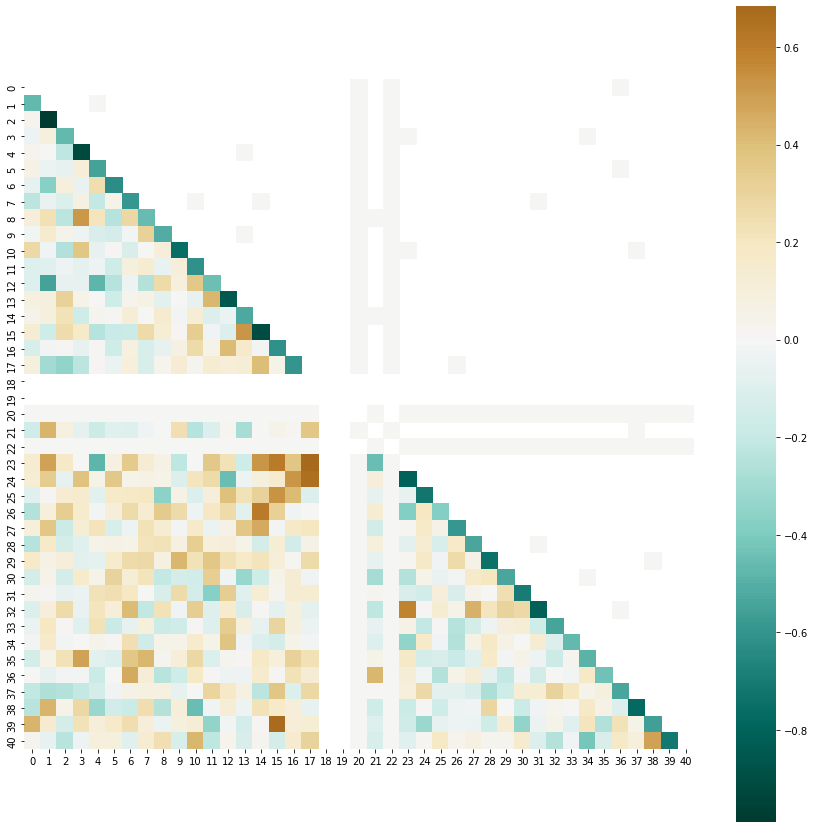

In [45]:
#AAGNGH heatmap
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import numpy as np
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap


mats1 = np.triu(np.log2(pair1/pair2))
plt.figure(figsize=(15,15))
sns.heatmap(np.log2(pair1/pair2),cmap='BrBG_r',mask=mats1, center=0, square=True)


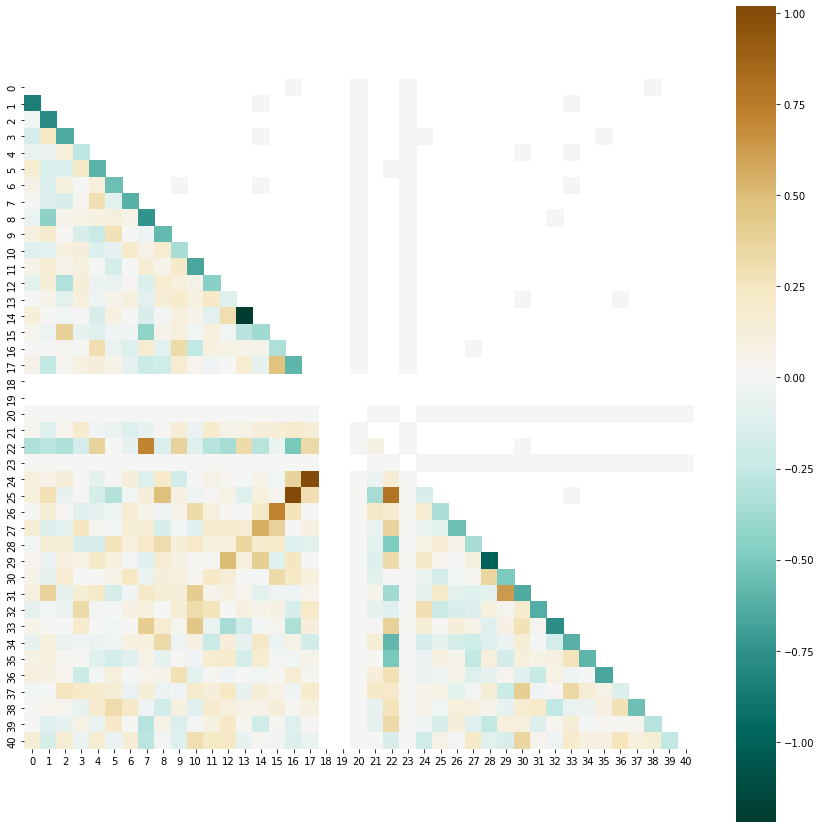

In [78]:
#AAGNHG heatmap
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import numpy as np
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap


mats11 = np.triu(np.log2(pair11/pair22))
plt.figure(figsize=(15,15))
sns.heatmap(np.log2(pair11/pair22),cmap='BrBG_r',mask=mats11, center=0, square=True)


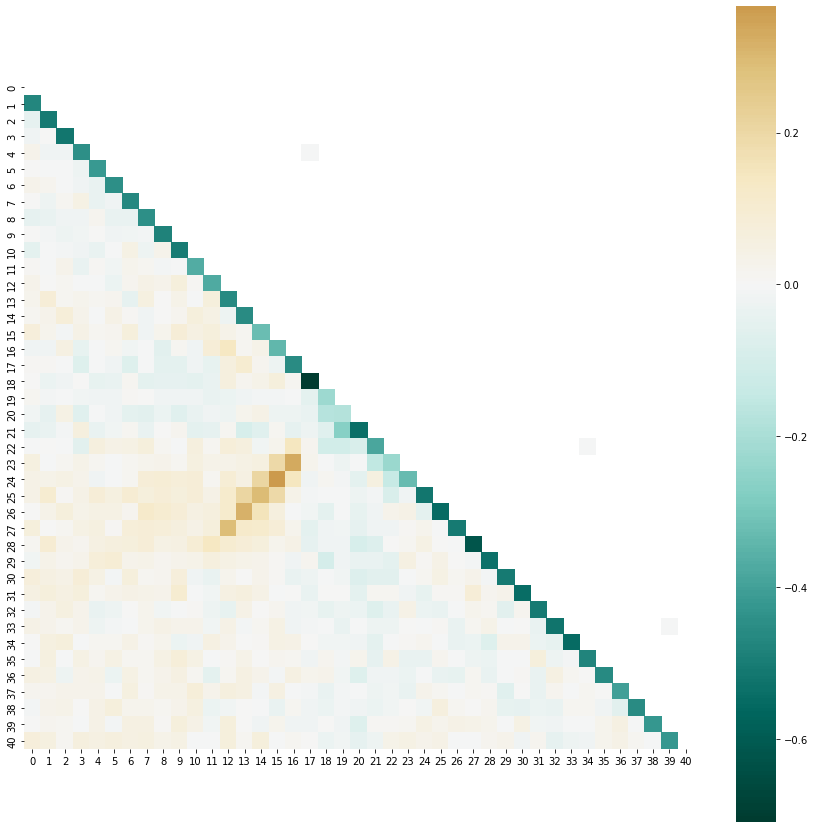

In [67]:
#whole set
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))

mats = np.triu(np.log2(pair_1/pair_2))

sns.heatmap(np.log2(pair_1/pair_2),cmap='BrBG_r',mask=mats, center=0, square=True)